In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Define wrapper functions

In [13]:
def weight_variable(shape):
    """ Create TensorFlow weight with initial noise. """
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """ Create TensorFlow bias with initial value of 0.1. """
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """ 2D TensorFlow convolution with stride of 1 and zero padding. """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """ TensorFlow max pooling over 2x2 blocks. """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')

def imshow(img, scale=None):

    # Assign default scale
    if not scale:
        scale = [np.min(img), np.max(img)]

    # Set up image plot
    plt.imshow(img, cmap='gray', vmin=scale[0], vmax=scale[1])
    plt.xticks([]), plt.yticks([])

    # Show
    plt.show()

#### Construct network

In [14]:
# Define variables
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 784])

In [15]:
## Layer 1 (Convolutional)

# Create weights
W_conv1 = weight_variable([5, 5, 1, 8])
b_conv1 = bias_variable([8])

# Reshape image
# -1 allows tf.reshape to infer that dimension
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolve image
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

In [16]:
## Layer 2 (Convolutional)

# Create weights
W_conv2 = weight_variable([5, 5, 8, 1])
b_conv2 = bias_variable([1])

# Convolve image
h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2)

In [17]:
## Apply dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_conv2, keep_prob)

In [18]:
## Readout layer

# Create weights
#W_fc2 = weight_variable([1024, 10])
#b_fc2 = bias_variable([10])

# Compute output
#y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_conv = tf.reshape(h_fc1_drop, [-1, 784])

#### Train network

step     0, current score 0.136757


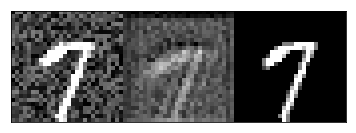

step  1000, current score 0.00519643


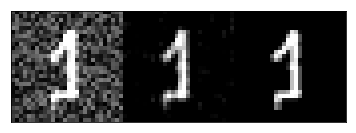

step  2000, current score 0.00356571


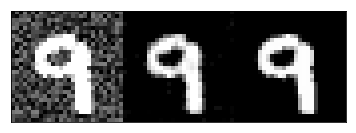

step  3000, current score 0.00315719


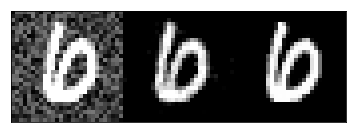

step  4000, current score 0.00296503


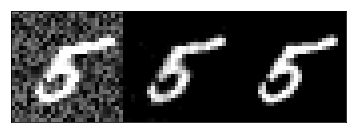

step  5000, current score 0.00267196


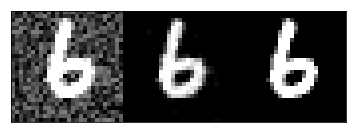

step  6000, current score 0.00275783


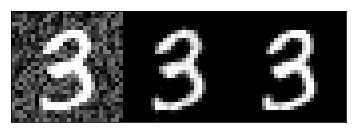

step  7000, current score 0.00246272


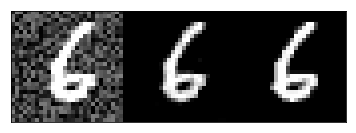

step  8000, current score 0.00227411


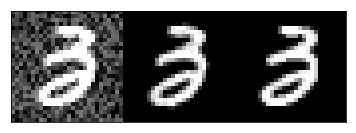

step  9000, current score 0.00219659


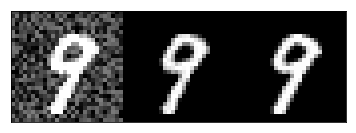

In [19]:
# Build training function
cross_entropy = tf.reduce_mean(tf.square(y_ - y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Build accuracy measure
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:

    # Initialize variables
    sess.run(tf.global_variables_initializer())

    # Iterate through 
    for i in range(10000):
        
        # Import next batch
        # batch = (data, labels)
        # data: 50 x 784, labels: 50 x 10
        batch = mnist.train.next_batch(50)
        noise_batch = batch[0] + 0.5*np.random.rand(*batch[0].shape)

        # Report iteration stats
        if i % 1000 == 0:
            train_accuracy = cross_entropy.eval(feed_dict={x: noise_batch,
                                                      y_: batch[0],
                                                      keep_prob: 1})
            print('step {:5d}, current score {:g}'.format(
                i, train_accuracy))
            
            test = y_conv.eval(feed_dict={x: noise_batch, keep_prob: 1})
            test = np.reshape(test[0, :], (28, 28))
            comp = np.reshape(noise_batch[0,:], (28,28))
            true = np.reshape(batch[0][0,:], (28,28))
            imshow(np.hstack((comp, test, true)), [0, 1])

        # Train network
        train_step.run(feed_dict={x: noise_batch,
                                  y_: batch[0], keep_prob: 1})

    result_kernel = np.squeeze(np.array(W_conv1.eval()))

#### Visualize batch element

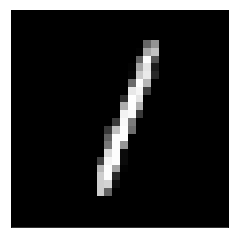

In [20]:
imshow(np.reshape(batch[0][1], (28, 28)))